In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

Ce document a pour objectif d'analyser le fichier des associations disponible sur data.gouv.fr avec un focus spécifique sur les associations autour du cancer de l'enfant dans le cadre du projet ACCE (dir. Besle)

https://www.data.gouv.fr/fr/datasets/repertoire-national-des-associations/

https://media.interieur.gouv.fr/rna/RNA_Liste_donnees_diffusees-V2.pdf

Attention : sauf dans les départements de la Moselle, du Bas-Rhin et du Haut-Rhin, qui relèvent du régime du Concordat

Chargement du fichier

In [2]:
data = pd.read_csv("../../../Downloads/rna_waldec_20180403.csv",sep=";", encoding = "ISO-8859-1")

/Users/emilien/anaconda3/envs/p35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2,3,14,15,18,23,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_imp = pd.read_csv("../../../Downloads/rna_import_20180403.csv",sep=";", encoding = "ISO-8859-1")

/Users/emilien/anaconda3/envs/p35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2,10,15,17,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.columns

Index(['id', 'id_ex', 'siret', 'rup_mi', 'gestion', 'date_creat', 'date_decla',
       'date_publi', 'date_disso', 'nature', 'groupement', 'titre',
       'titre_court', 'objet', 'objet_social1', 'objet_social2',
       'adrs_complement', 'adrs_numvoie', 'adrs_repetition', 'adrs_typevoie',
       'adrs_libvoie', 'adrs_distrib', 'adrs_codeinsee', 'adrs_codepostal',
       'adrs_libcommune', 'adrg_declarant', 'adrg_complemid',
       'adrg_complemgeo', 'adrg_libvoie', 'adrg_distrib', 'adrg_codepostal',
       'adrg_achemine', 'adrg_pays', 'dir_civilite', 'telephone', 'siteweb',
       'email', 'publiweb', 'observation', 'position', 'maj_time'],
      dtype='object')

In [69]:
data_imp["objet"] = data_imp["objet"].str.lower()
data["objet"] = data["objet"].str.lower()

Recodage de variables

In [9]:
data['date_creation'] = pd.to_datetime(data['date_creat'],errors='coerce')
data['year_creation'] = data['date_creation'].apply(lambda x : x.year)
data['date_decla'] = pd.to_datetime(data['date_decla'],errors='coerce')
data["year_decla"] = data["date_decla"].apply(lambda x : x.year)
data['date_disso'] = pd.to_datetime(data['date_disso'],errors='coerce')
data["year_disso"] = data["date_disso"].apply(lambda x : x.year)
data["num"]=1

In [101]:
def duree(x):
    if pd.notnull(x["year_disso"]):
        return x["year_disso"]-x['year_creation']
    return None
data["duree"] = data.apply(duree,axis=1)
data[data["duree"]<0]=None

In [15]:
data_imp.columns

Index(['id', 'id_ex', 'siret', 'gestion', 'date_creat', 'date_publi', 'nature',
       'groupement', 'titre', 'objet', 'objet_social1', 'objet_social2',
       'adr1', 'adr2', 'adr3', 'adrs_codepostal', 'libcom', 'adrs_codeinsee',
       'dir_civilite', 'telephone', 'siteweb', 'email', 'observation',
       'position', 'rup_mi', 'maj_time'],
      dtype='object')

In [60]:
data_imp['date_creation'] = pd.to_datetime(data_imp['date_creat'],errors='coerce')
data_imp['year_creation'] = data_imp['date_creation'].apply(lambda x : x.year)
data_imp['date_maj'] = pd.to_datetime(data_imp['maj_time'],errors='coerce')
data_imp['year_maj'] = data_imp['date_maj'].apply(lambda x : x.year)

data_imp["num"]=1

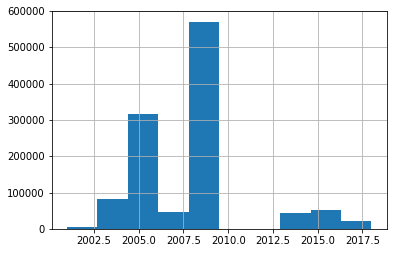

In [64]:
data_imp['year_maj'].hist(bins=10)

L'année de MAJ ne peut pas vraiment être utilisée comme date de dissolution. La seule hypothèse qu'il est possible de faire est que les associations du fichier IMP qui n'est pas dans WALD ont été dissoute avant ...

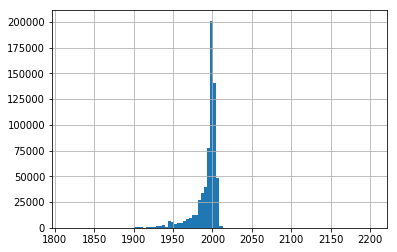

In [17]:
data_imp['year_maj'].hist(bins=100)

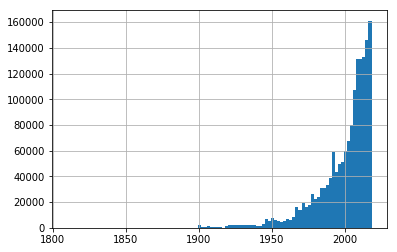

In [14]:
data["year_creation"].hist(bins=100)

Identifier des mots clés dans le descriptif

In [70]:
def reco(x,u):
    if pd.isnull(x):
        return None
    if u in x:
        return 1
    return 0

data["cancer"] = data["objet"].apply(lambda x : reco(x,"cancer"))
data["enfant"] = data["objet"].apply(lambda x : reco(x,"enfant"))
data["indic_cancerenfant"] = (data["enfant"]==1) & (data["cancer"]==1)
data["indic_cancer"] = (data["cancer"]==1)

In [71]:
data_imp["enfant"] = data_imp["objet"].apply(lambda x : reco(x,"enfant"))
data_imp["cancer"] = data_imp["objet"].apply(lambda x : reco(x,"cancer"))
data_imp["indic_cancerenfant"] = (data_imp["enfant"]==1) & (data_imp["cancer"]==1)
data_imp["indic_cancer"] = (data_imp["cancer"]==1)

Création de variables indicatrices

In [76]:
#data["indic_cancerenfant"] = (data["enfant"]==1) & (data["cancer"]==1)
#data["indic_cancer"] = (data["cancer"]==1)
def cod(x):
    if x["indic_cancerenfant"]:
        return "Enfant"
    elif x["indic_cancer"]:
        return "Cancer"
    return "Autre"
data["type_cancer"] = data.apply(cod,axis=1)


In [77]:
data_imp["type_cancer"] = data_imp.apply(cod,axis=1)

## Analyses

### Quand ont été fondées les associations ?

Toutes les associations

Pour cela il faut travailler sur les deux jeux de données

(1900, 2017)

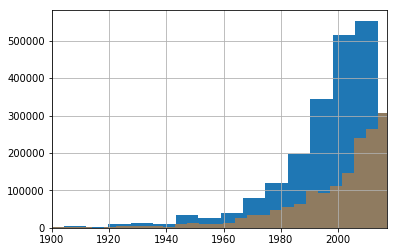

In [100]:
ax = data["year_creation"].append(data_imp["year_creation"]).hist(bins=50)
data["year_creation"].hist(bins=50,ax=ax,alpha=0.5)

plt.xlim(1900,2017)

In [114]:
t = data[["year_creation","type_cancer"]].append(data_imp[["year_creation","type_cancer"]])

/Users/emilien/anaconda3/envs/p35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


type_cancer
Autre     AxesSubplot(0.125,0.125;0.775x0.755)
Cancer    AxesSubplot(0.125,0.125;0.775x0.755)
Enfant    AxesSubplot(0.125,0.125;0.775x0.755)
Name: year_creation, dtype: object

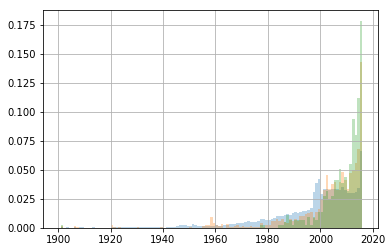

In [119]:
t.groupby("type_cancer")["year_creation"].hist(alpha=0.3,normed=True,bins=range(1900,2017))

In [121]:
t.groupby("type_cancer")["year_creation"].agg(["count","mean","median"])

,count,mean,median
type_cancer,,,
Autre,2257935,1997.474410,2002.0
Cancer,2467,2004.517633,2008.0
Enfant,511,2009.461840,2012.0


Text(0.5,0,'Année')

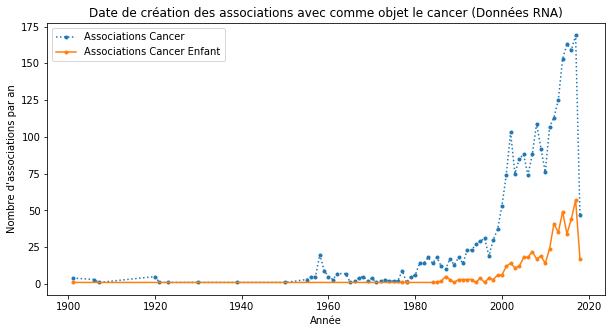

In [134]:
ax = t[t["type_cancer"]=="Cancer"]["year_creation"].value_counts().sort_index().plot(style=".:",figsize=(10,5))
t[t["type_cancer"]=="Enfant"]["year_creation"].value_counts().sort_index().plot(ax=ax,style=".-")
plt.legend(["Associations Cancer","Associations Cancer Enfant"])
plt.title("Date de création des associations avec comme objet le cancer (Données RNA)")
plt.ylabel("Nombre d'associations par an")
plt.xlabel("Année")

### Quel âge ont les associations françaises (jusqu'à maintenant ou à leur dissolution) ?

(0, 150)

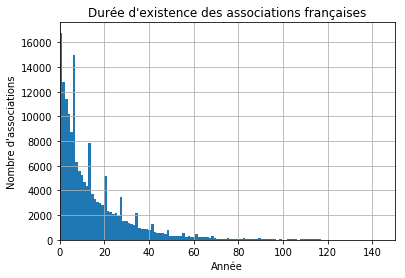

In [102]:
data["duree"].hist(bins=100)
plt.title("Durée d'existence des associations françaises")
plt.xlabel("Année")
plt.ylabel("Nombre d'associations")
plt.xlim(0,150)

Text(0,0.5,"Nombre d'associations")

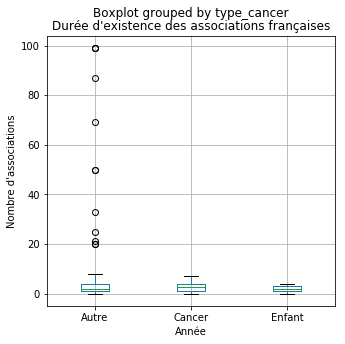

In [103]:
data[data["year_creation"]>2009].boxplot(column=["duree"], by="type_cancer",figsize=(5,5))
#.hist(bins=50,normed=True,alpha=0.5)
plt.title("Durée d'existence des associations françaises")
plt.xlabel("Année")
plt.ylabel("Nombre d'associations")


In [105]:
data.groupby("type_cancer")["duree"].agg(["count","mean","median","std"])

,count,mean,median,std
type_cancer,,,,
Autre,169684,14.781400,9.0,16.134823
Cancer,208,10.043269,6.0,13.254224
Enfant,36,3.500000,2.5,3.299351


### Intitulés

In [110]:
data_imp[data_imp["indic_cancerenfant"]==1]["objet"]

35636      ade matérielle ou psychologique destinée aux e...
45579      soutenir le développement de la recherche sur ...
65436      récolter des fonds pour améliorer les conditio...
132441     venir en aide aux enfants handicapes de quelqu...
138493     d'apporter une aide financière et morale dans ...
161995     aider les parents dans la terrible epreuve du ...
162070     aider les parents en difficulte financiere fac...
172860     buts humanitaires. activites au profit d'enfan...
197877     actions de solidarité bénévoles pr aider a la ...
198791     assurer la coordination,les démarches de finan...
206900     sensibilisation du grand public au problème du...
214229     favoriser l'accueil d'enfants malades atteints...
243703     aide morale et pécuniaire aux familles d'enfan...
275183     comite d'accueil pour enfants etrangers ou iso...
343308     accompagner les enfants malades de toutes orig...
369140     récolter de l'argent pour l'achat d'une pompe ...
397969     aide aux enfa

In [111]:
data[data["indic_cancerenfant"]==1]["objet"]

560        aider les enfants pauvres d'afrique atteints d...
3652       registre destine a enregistrer tous les nouvea...
13687      cette association a pour but d'apporter un sou...
14357      organiser la manifestation intitulée " la litt...
16372      aide à la scolarisation et à l'éducation sport...
16642      soutenir la recherche médicale pour l'améliora...
20154      organiser divers événements afin de récolter d...
24780      l'association dite "victoir" est une associati...
27446      defendre l'alternative therapeutique qu'offre ...
29880      mobilise toutes les energies et favorise les c...
30314      aide directe aux enfants atteints de maladies ...
33041      aide, soutien et amélioration du bien-être aux...
35614      récolter des fonds pour les enfants atteints d...
38935      soutenir les familles nécessitantes de l 'aide...
38965      favoriser la recherche sur les cancers et leuc...
52966      donner une aide morale materielle et financier...
53034      venir en aide